In [55]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import uniform, standard_normal

## Monte Carlo Simulation

Monte Carlo Simulations are statistical simulations used to calculate expectation when analytical methods fail.

One of the most famous stories about the origins of Monte Carlo simulation dates back to Comte de Buffon, an 18th century mathematician and count in France who tried to answer the question, *If I draw 2 lines on the floor, of length x apart, and I drop a needle of length l, what is the probability that the needle intersects one of two lines?*

The answer turns out to be:

$$p = \frac{2}{\pi} \frac{l}{x}$$

Using the Law of Large Numbers, if we repeat the experiment with 1000 needles or even 10000 needle drops, tallying up how many needles actually crossed one of two lines, divided by the total number of drops, we can accurately and empirically estimate the probability $p$. 

Other uses of Monte Carlo Simulations include estimating area under of curve for difficult to evaluate integrals when numerical integration methods fail in physics.

<ins>Example 1: Evaluating a difficult integral</ins>

$$I = \int_{0.5}^2 \frac{x^2 \ln((\sin{(x)}))}{e^x} dx$$

The steps to evaluating the integral are as follows:
- Plot out the function between 0.5 and 2
- Bound the function into a square box
- Randomly generate points in this square box
- Count the number of points that lie under the curve
- Divide that by the total number of randomly generated points multiplied by the total area of the box

In [37]:
x = np.linspace(0.5, 2, 2000)

In [38]:
y = x**2 * np.log(np.sin(x)) / np.exp(x)

In [39]:
X = uniform(0.5, 2.0, 2000)
Y = uniform(-0.12, 0, 2000)

(0.5, 2.0)

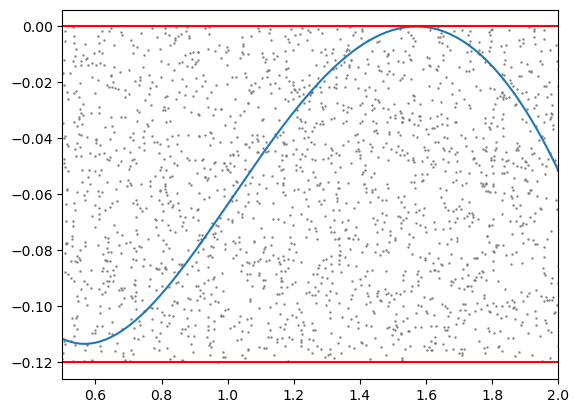

In [53]:
plt.plot(x, y)
plt.axhline(0, color='r')
plt.axhline(-0.12, color='r')
plt.scatter(X, Y, color='grey', s=0.5)

plt.xlim(0.5, 2)

In [49]:
(Y >= y).sum() / Y.shape * (2.0 - 0.5) * (0.12)

array([0.07083])

The value of the integral is therefore -0.07 (negative since it is below the x axis). The result agrees with numberical integration

In [54]:
np.trapz(y, x, dx=0.005)

-0.06902394998382971

### Expected Value with Monte Carlo

To calculate the expected value using Monte Carlo, we must be able to draw from the population of the distribution. 

<ins>Example 1: Gaussian Integral</ins>
Assume $X \sim N(0, 1)$, we want to evaluate the expected value of $f(x) = x^4 + x^2 + 1$. 

$$E[f(x)] \approx \frac{1}{n} \sum_i^n f(x_i)$$

We can now try to simulate a sample of $X$ from the standard normal distribution and plug each of those into $f(x)$ and take an average.

In [70]:
x = standard_normal(5000)

In [71]:
y = x**4 + x**2 + 1

In [72]:
np.mean(y)

5.021287158061526

We can simulate this many times to get a distribution of this expected value, and use the Central Limit Theorem

In [81]:
mean = np.zeros(1000)

for i in range(1000):
    x = standard_normal(5000)
    y = x**4 + x**2 + 1
    mean[i] = y.mean()

(array([ 3.,  2.,  2.,  1.,  4.,  3.,  7., 12., 11.,  7., 10., 11., 24.,
        22., 25., 34., 27., 28., 37., 35., 32., 38., 47., 46., 42., 44.,
        34., 45., 50., 46., 35., 25., 31., 21., 20., 23., 21., 15., 16.,
         8., 17., 15.,  7.,  5.,  2.,  5.,  1.,  1.,  1.,  2.]),
 array([4.5807959 , 4.59768169, 4.61456747, 4.63145326, 4.64833904,
        4.66522483, 4.68211062, 4.6989964 , 4.71588219, 4.73276797,
        4.74965376, 4.76653954, 4.78342533, 4.80031111, 4.8171969 ,
        4.83408269, 4.85096847, 4.86785426, 4.88474004, 4.90162583,
        4.91851161, 4.9353974 , 4.95228318, 4.96916897, 4.98605476,
        5.00294054, 5.01982633, 5.03671211, 5.0535979 , 5.07048368,
        5.08736947, 5.10425525, 5.12114104, 5.13802683, 5.15491261,
        5.1717984 , 5.18868418, 5.20556997, 5.22245575, 5.23934154,
        5.25622732, 5.27311311, 5.2899989 , 5.30688468, 5.32377047,
        5.34065625, 5.35754204, 5.37442782, 5.39131361, 5.40819939,
        5.42508518]),
 <BarContainer

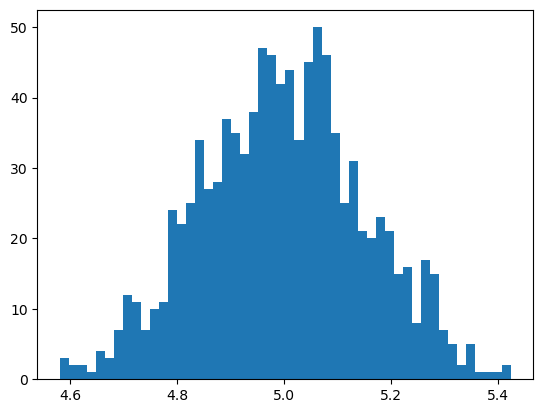

In [80]:
plt.hist(mean, bins=50)